# Pré-processamento dos dados com Python

Para este hands on vamos usar mais uma vez o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). 

Antes de aplicarmos qualquer classificador sobre este problema precisamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## Dicionário de Dados

**Survived**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



### Limpeza dos Dados

- Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
#Setando as configurações
pd.set_option('max_columns',100)

* Crie um dataframe com o arquivo **titanic_train.csv** ...

In [2]:
data = pd.read_csv('titanic_train.csv')

- Visualize os 5 primeiros elementos do seu data set

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para visualizar as colunas onde faltam mais dados!

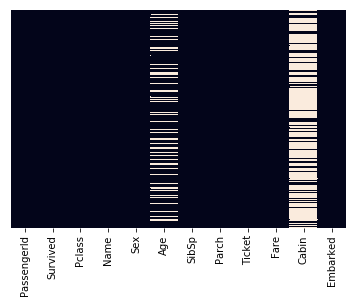

In [4]:
sns.heatmap(data=data.isnull(), yticklabels=False, cbar=False)

* Calcule o percentual de valores faltantes para cada coluna
    - Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?
        - **Resp.:** Para o atributo "Age" podemos fazer o input dos valores faltantes considerando a média, mediana ou moda.
    - E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor?
        - **Resp.:** Para o atributo "Cabin" podemos fazer o input considerando o valor que mais se repete ou podemos aplicar alguns filtros considerando alguma regra de negócio. Outra opção é descartar esse atributo pois o percentual de valores nulos é muito alto.

In [5]:
percent = data.count()/len(data.index)
percent_df = 1 - percent
percent_df = percent_df.to_frame()
percent_df.rename(columns={0: 'percent'}, inplace=True)
percent_df.head(10)

,percent
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


* Plot o percentual de valores faltantes para cada coluna

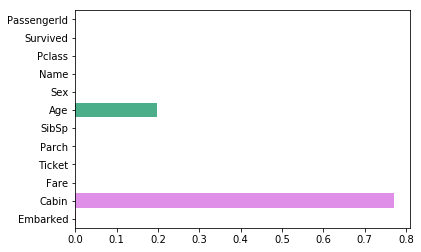

In [6]:
sns.barplot(data=percent_df.transpose(), orient='h')

- Como há poucas amostras sem o valor do atributo **Age** podemos realizar o input desta feature.
Qual a melhor maneira de preencher o valor da idade? Seria com a média, mediana ou com alguma função que considera algum filtro?
    - **Resp.:** Quanto mais específica melhor e mais trabalhoso também. O input sugerido na questão abaixo é a melhor opção dentre as apresentadas

- Utilize a função describe e visualize o atributo **Age**. ***Dica:*** Sua decisão pode ser um filtro para recuperar a média ou mediana da idade por classe

In [7]:
data.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


- Para preencher a coluna **Age** você pode criar:
    - uma função que retorne um valor, e posteriormente aplicar na coluna **Age**, por exemplo **df['column'] = df[['column']].apply(function, axis=1)**.
    - ou utilizar a função fillna()

In [8]:
ages_median = data.groupby('Pclass')['Age'].median()

def impute_age(cols, ages_per_pclass):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        return ages_per_pclass.loc[pclass]
    else:
        return age

data['Age'] = data[['Age','Pclass']].apply(impute_age, args=([ages_median]), axis=1)

- Crie um novo mapa de calor.

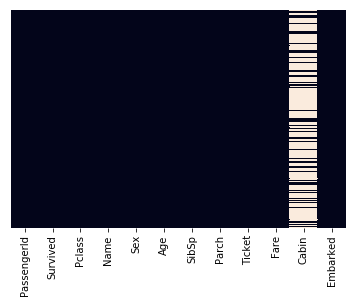

In [9]:
sns.heatmap(data=data.isnull(), yticklabels=False, cbar=False)

* Elimine as colunas **Cabin e PassengerId** do DataSet. Por quê mesmo vamos eliminá-las?

In [10]:
data.drop(['Cabin','PassengerId'], axis=1, inplace=True)

* Construa um novo heatmap e verifique se ainda há algum valor nulo.

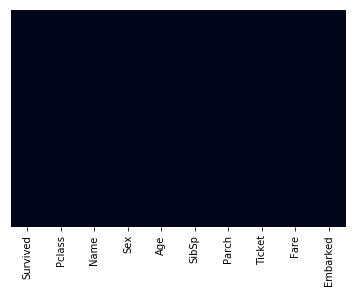

In [11]:
sns.heatmap(data=data.isnull(), yticklabels=False, cbar=False)

* Verique se há registros com valores atributos nulos. Vale a pena realizar o input dos valores? Se não elimine-os ***Dica:*** df.dropna(inplace=True). 

In [12]:
len(data.index) - data.count()#Há dois registros nulos com a coluna embarked
#data[data['Embarked'].isnull()]

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [13]:
data.dropna(inplace=True)#Após este comando não há mais registros nulos

### Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

### Hands on

* Veja o exemplo abaixo ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [14]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
data.drop(['Sex'],axis=1,inplace=True)
data = pd.concat([data,sex],axis=1)
data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


* Refaça o mesmo processo de tratamento para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**). Visualize como os seus dados estão ficando

In [15]:
embarked = pd.get_dummies(data['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(data['Pclass'], prefix='Class')
data = pd.concat([data, pclass, embarked],axis=1)

* Você pode usar a função info() para visualizar informações do seu dataFrame

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Name          889 non-null object
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Ticket        889 non-null object
Fare          889 non-null float64
Embarked      889 non-null object
male          889 non-null uint8
Class_1       889 non-null uint8
Class_2       889 non-null uint8
Class_3       889 non-null uint8
Embarked_C    889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 75.5+ KB


* Remova as variáveis que passaram pelo processo de one hot encoding. 

In [17]:
data.drop(['Embarked','Pclass'], axis=1, inplace=True)

* O que o código acima fez? Por quê não foram adicionadas as colunas "Female" e "C"?
    - Resp.: Todos os valores fizeram parte do processo de oneHotEnconding

- Aplique normalização sobre as tarifas. Crie a sua função ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Vale a pena realizar normalização sobre todo o dataset?
    - Resp.: Dependendo do algoritmo que vai ser utilizado sim, por exemplo um algoritmo de Redes Neurais seria interessante aplicar, para uma árvore de decisão é indiferente

In [18]:
mean_fare = data['Fare'].mean()
max_fare = data['Fare'].max()
min_fare = data['Fare'].min()
data['N_Fare'] = data['Fare'].apply( lambda fare: (fare - mean_fare)/(max_fare - min_fare))
data.drop(['Fare'], axis=1, inplace=True)

In [19]:
data.head()

,Survived,Name,Age,SibSp,Parch,Ticket,male,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,N_Fare
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1,0,0,1,0,0,1,-0.048497
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0,1,0,0,1,0,0,0.076487
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0,0,0,1,0,0,1,-0.047180
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0,1,0,0,0,0,1,0.040996
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,1,0,0,1,0,0,1,-0.046936


- Você pode querer criar uma feature categórica com base na idade da pessoa, (por exemplo, criança, jovem, adulto e idoso), para substituir o atributo idade.
    - Resp.: Esta é uma opção completamente válida, porém para este caso a idade os primeiros experimentos serão realizados com o valor absoluto da idade. Esta transformação poderia ser válida caso o algoritmo Naive Bayes fosse uma das soluções candidatas.

- Você pode substituir o nome pelos pronomes de tratamento (por exemplo, Miss., Mrs)

In [20]:
import re

def get_pronome_tratamento(name):
    pattern = re.search("\\,(.+?)\\.", name)
    found='Other'
    if pattern:
        #print(pattern)
        found = pattern.group(1)
        #print(found)
    return found

#Recuperando o pronome
data['Pronoun'] = data['Name'].apply(get_pronome_tratamento)
#Aplicando o oneHotEncoding
pronoun = pd.get_dummies(data['Pronoun'], prefix='Pronoun')
data = pd.concat([data, pronoun],axis=1)
#Eliminando a coluna name
data.drop(['Name', 'Pronoun'],axis=1,inplace=True)
#Exibindo os resultados
data.head()


,Survived,Age,SibSp,Parch,Ticket,male,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,N_Fare,Pronoun_ Capt,Pronoun_ Col,Pronoun_ Don,Pronoun_ Dr,Pronoun_ Jonkheer,Pronoun_ Lady,Pronoun_ Major,Pronoun_ Master,Pronoun_ Miss,Pronoun_ Mlle,Pronoun_ Mme,Pronoun_ Mr,Pronoun_ Mrs,Pronoun_ Ms,Pronoun_ Rev,Pronoun_ Sir,Pronoun_ the Countess
0,0,22.0,1,0,A/5 21171,1,0,0,1,0,0,1,-0.048497,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,PC 17599,0,1,0,0,1,0,0,0.076487,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,0,0,0,1,0,0,1,-0.047180,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,113803,0,1,0,0,0,0,1,0.040996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,373450,1,0,0,1,0,0,1,-0.046936,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


- Existe alguma informação que você pode substituir pelo ticket? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete. Por quê realizar este tipo de tratamento?
    - Resp.: É possível aplicar esse tratamento sugerido. Para valores únicos, como id´s, podemos encontrar uma forma de procurar alguma forma de sumarizar os seus valores

In [21]:
### Uma sugestão que talvez não provoque grandes mudanças nos resultados
def new_ticket(ticket):
    nt = ticket[0]+"_"+str(len(ticket))
    return nt

data['New_Ticket'] = data['Ticket'].apply(new_ticket)
#Vamos aplicar o one hot encoding sobre o atributo New_Ticket
new_ticket = pd.get_dummies(data['New_Ticket'],prefix='Ticket')
data = pd.concat([data, new_ticket],axis=1)
data.drop(['Ticket', 'New_Ticket'], axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,male,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,N_Fare,Pronoun_ Capt,Pronoun_ Col,Pronoun_ Don,Pronoun_ Dr,Pronoun_ Jonkheer,Pronoun_ Lady,Pronoun_ Major,Pronoun_ Master,Pronoun_ Miss,Pronoun_ Mlle,Pronoun_ Mme,Pronoun_ Mr,Pronoun_ Mrs,Pronoun_ Ms,Pronoun_ Rev,Pronoun_ Sir,Pronoun_ the Countess,Ticket_1_4,Ticket_1_5,Ticket_1_6,Ticket_2_4,Ticket_2_5,Ticket_2_6,Ticket_3_4,Ticket_3_5,Ticket_3_6,Ticket_3_7,Ticket_4_4,Ticket_5_4,Ticket_5_5,Ticket_6_3,Ticket_6_4,Ticket_6_5,Ticket_7_4,Ticket_8_4,Ticket_9_4,Ticket_A_10,Ticket_A_8,Ticket_A_9,Ticket_C_10,Ticket_C_16,Ticket_C_6,Ticket_C_7,Ticket_C_8,Ticket_C_9,Ticket_F_10,Ticket_F_12,Ticket_F_9,Ticket_L_4,Ticket_P_7,Ticket_P_8,Ticket_P_9,Ticket_S_10,Ticket_S_11,Ticket_S_12,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,0,22.0,1,0,1,0,0,1,0,0,1,-0.048497,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,0,1,0,0,0.076487,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1,-0.047180,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,1,0,0,0,0,1,0.040996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1,-0.046936,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Salve o dataset tratado em um arquivo chamado 'titanic_ready_to_ml.csv'

In [22]:
data.to_csv('titanic_ready_to_ml.csv', index=False)

### Desafio

- Se você deseja aplicar o mesmo pipeline de transformações sobre o dataset **titanic_test.csv** seria necessário criar um pipeline de transformações, a criação de um pipeline customizado tornaria esta tarefa mais fácil. Veja esta [dica!](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)